# Use of smartphones and People with Computer Anxiety

## Dataset

**Description:** Dataset containing metrics and scale results from field study performed at @CRECI. The study aims at supporting personalization features for people with Computer Anxiety (PwCA). The analyses use data from interaction logs to identify levels of Computer Anxiety (CA)

**Goal:** Identify attributes to support regression for CARS values and classification using groups of PwCA.

In [1]:
import pandas as pd
import numpy as np
import imblearn

from matplotlib import pyplot as plt
from sklearn import preprocessing
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

from ipyfilechooser import FileChooser
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler

## Loading Excel File

In [2]:
fc = FileChooser('C:/Users/thiag/Documents/Doutorado/CHI 2021') ; # https://pypi.org/project/ipyfilechooser/
display(fc)
# /Users/vagsant/Documents/supervision/current/thiago santos/data/elementos-analise-video-graficos2.xlsx

FileChooser(path='C:/Users/thiag/Documents/Doutorado/CHI 2021', filename='', title='HTML(value='', layout=Layo…

In [3]:
print(fc.selected)

C:/Users/thiag/Documents/Doutorado/CHI 2021\elementos-analise-video-graficos2.xlsx


In [4]:
xlsx = pd.ExcelFile( fc.selected ) ;
df = pd.read_excel( xlsx, 'Todos os dados' ) ;

## Comparing Age vs. CARS

In [6]:
df_high = df[df['CARS'] > 47]
df_low = df[df['CARS'] < 34]
df_moderate = df[df['CARS'] >= 34]
df_moderate = df_moderate[df_moderate['CARS'] <= 47]

In [7]:
len( df_low )

7

In [8]:
len( df_moderate )

14

In [9]:
len( df_high )

10

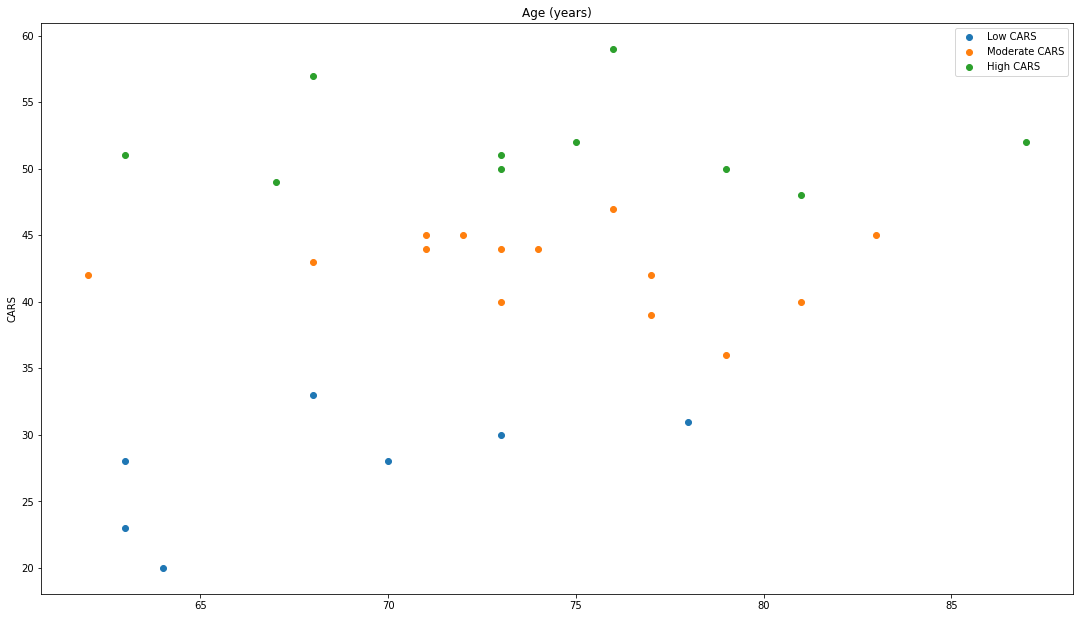

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.scatter(df_low['Age'], df_low['CARS'],  label='Low CARS', norm=False)
plt.scatter(df_moderate['Age'], df_moderate['CARS'],  label='Moderate CARS', norm=True)
plt.scatter(df_high['Age'], df_high['CARS'],  label='High CARS', norm=True)
ax.legend()
plt.ylabel('CARS')
plt.title('Age (years)')
plt.show()

In [11]:
swtest, p_age = shapiro( df[ 'Age' ] )
swtest, p_cars = shapiro( df[ 'CARS' ] )

print( 'Shapiro-Wilk (Age) p-value: {:.5f}'.format( p_age ) ) 
print( 'Shapiro-Wilk (CARS) p-value: {:.5f}'.format( p_cars ) ) 

Shapiro-Wilk (Age) p-value: 0.63876
Shapiro-Wilk (CARS) p-value: 0.21348


In [12]:
k = 'Age'
utest, p_lm = mannwhitneyu( df_low[ k ], df_moderate[ k ] )
print(utest)
utest, p_lh = mannwhitneyu( df_low[ k ], df_high[ k ] )
print(utest)
utest, p_mh = mannwhitneyu( df_moderate[ k ], df_high[ k ] )
print(utest)

print( 'Low CARS vs. Moderate CARS p-value {:.5f}'.format( p_lm ) ) 
print( 'Low CARS vs. High CARS p-value {:.5f}'.format( p_lh ) ) 
print( 'Moderate CARS vs. High CARS p-value {:.5f}'.format( p_mh ) ) 


23.5
18.5
70.0
Low CARS vs. Moderate CARS p-value 0.03074
Low CARS vs. High CARS p-value 0.05819
Moderate CARS vs. High CARS p-value 0.48828


No handles with labels found to put in legend.


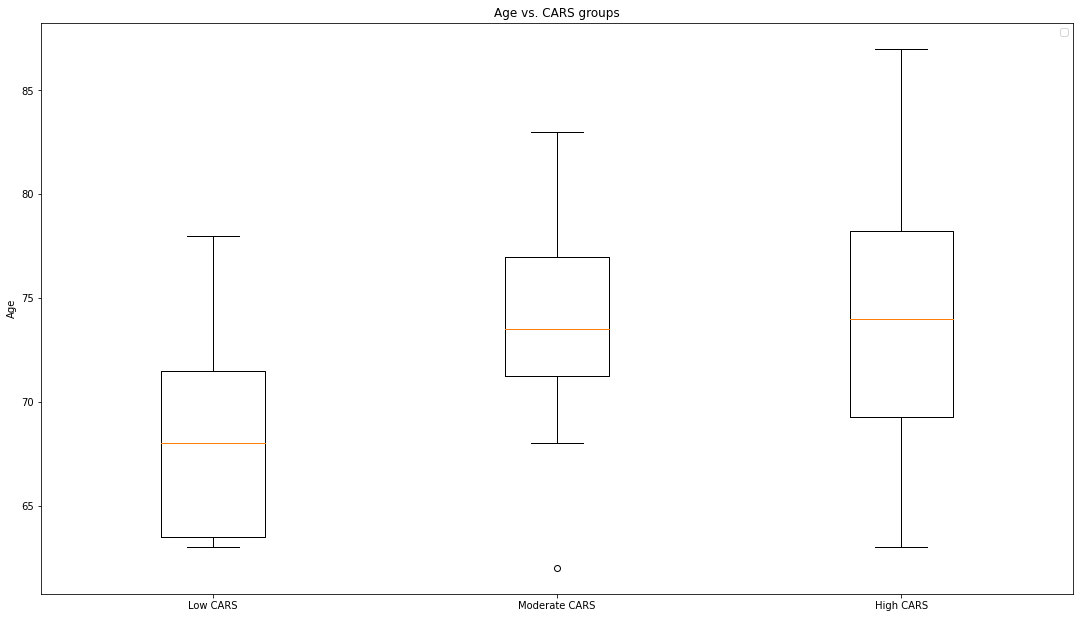

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.boxplot([df_low['Age'], df_moderate['Age'], df_high['Age']])
ax.legend()
ax.set_xticklabels(['Low CARS', 'Moderate CARS', 'High CARS']) 
plt.ylabel('Age')
plt.title('Age vs. CARS groups')
plt.show()

No handles with labels found to put in legend.


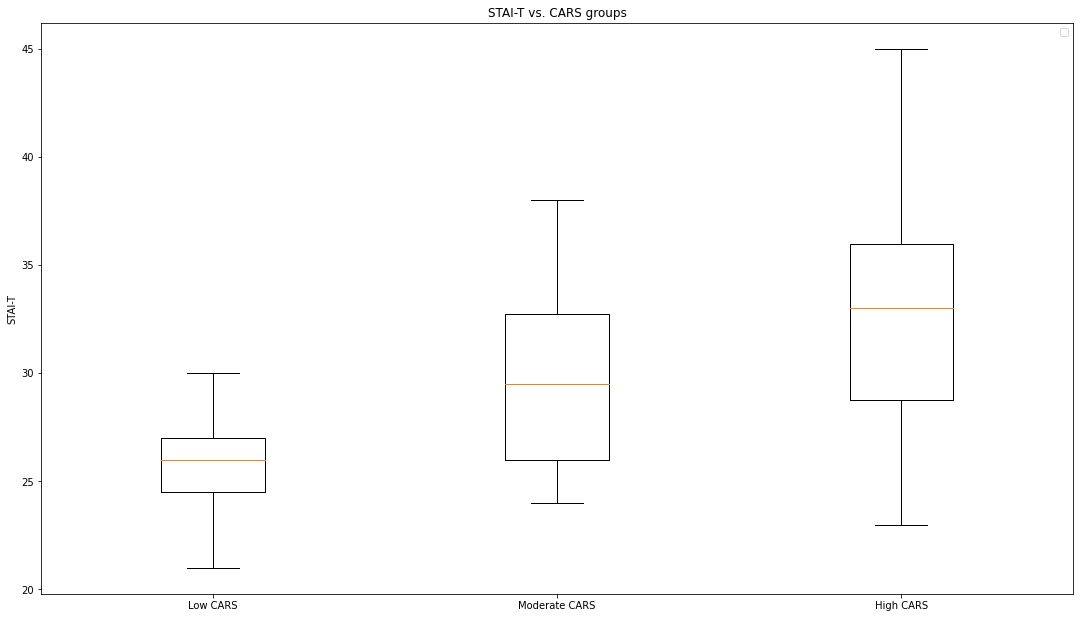

In [14]:
k = 'STAI-T'
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.boxplot([df_low[k], df_moderate[k], df_high[k]])
ax.legend()
ax.set_xticklabels(['Low CARS', 'Moderate CARS', 'High CARS']) 
plt.ylabel(k)
plt.title( k + ' vs. CARS groups')
plt.show()

No handles with labels found to put in legend.


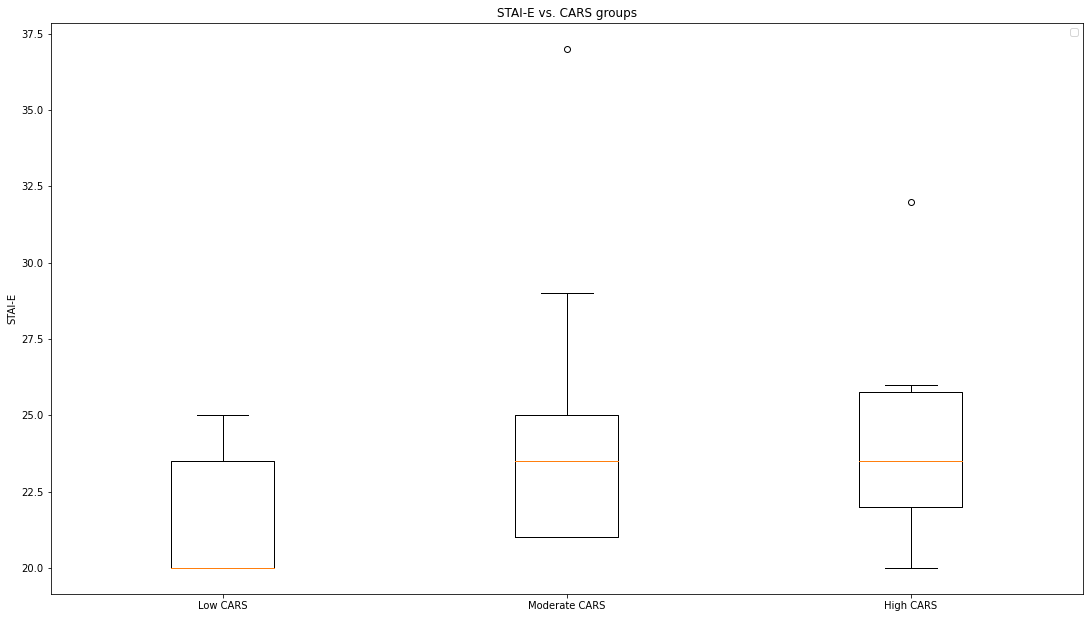

In [15]:
k = 'STAI-E'
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.boxplot([df_low[k], df_moderate[k], df_high[k]])
ax.legend()
ax.set_xticklabels(['Low CARS', 'Moderate CARS', 'High CARS']) 
plt.ylabel(k)
plt.title( k + ' vs. CARS groups')
plt.show()

In [16]:
swtest, p_stai_t = shapiro( df[ 'STAI-T' ] )
swtest, p_stai_e = shapiro( df[ 'STAI-E' ] )

print( 'Shapiro-Wilk (STAI-T) p-value: {:.5f}'.format( p_stai_t ) ) 
print( 'Shapiro-Wilk (STAI-E) p-value: {:.5f}'.format( p_stai_e ) ) 

Shapiro-Wilk (STAI-T) p-value: 0.12382
Shapiro-Wilk (STAI-E) p-value: 0.00014


In [17]:
k = 'STAI-T'
utest, p_lm = mannwhitneyu( df_low[ k ], df_moderate[ k ] )
utest, p_lh = mannwhitneyu( df_low[ k ], df_high[ k ] )
utest, p_mh = mannwhitneyu( df_moderate[ k ], df_high[ k ] )

print( 'Low CARS vs. Moderate CARS p-value {:.5f}'.format( p_lm ) ) 
print( 'Low CARS vs. High CARS p-value {:.5f}'.format( p_lh ) ) 
print( 'Moderate CARS vs. High CARS p-value {:.5f}'.format( p_mh ) ) 

Low CARS vs. Moderate CARS p-value 0.03561
Low CARS vs. High CARS p-value 0.00534
Moderate CARS vs. High CARS p-value 0.10856


In [18]:
k = 'STAI-E'
utest, p_lm = mannwhitneyu( df_low[ k ], df_moderate[ k ] )
utest, p_lh = mannwhitneyu( df_low[ k ], df_high[ k ] )
utest, p_mh = mannwhitneyu( df_moderate[ k ], df_high[ k ] )

print( 'Low CARS vs. Moderate CARS p-value {:.5f}'.format( p_lm ) ) 
print( 'Low CARS vs. High CARS p-value {:.5f}'.format( p_lh ) ) 
print( 'Moderate CARS vs. High CARS p-value {:.5f}'.format( p_mh ) ) 

Low CARS vs. Moderate CARS p-value 0.02931
Low CARS vs. High CARS p-value 0.05054
Moderate CARS vs. High CARS p-value 0.44096


# Building a classifier after resampling CARS groups

In [19]:
# Task Time(sec)
# Clicks Number
# DB Clicks Number
# MEAN CLICK DURATION (sec)
# TYPING VELOCITY (key/min)
# TOTAL TIME TYPING (sec)

X = df.iloc[:, [14, 21, 22, 23, 32, 33] ] # Columns that could be recorded in a mobile seting
y = df['CLASS']

In [20]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
print ( len( y_over ) )
X_over, y_over = oversample.fit_resample(X_over, y_over)
print ( len( y_over ) )

37
39


In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.3, random_state = 0)

In [22]:
import xgboost as xgb
from xgboost import XGBClassifier

classifier = XGBClassifier()
classifier.fit(X_train_over, y_train_over)

c:\users\thiag\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:52:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
y_pred_over = classifier.predict(X_test_over)

In [24]:
y_test_over == y_pred_over

4     False
28     True
29    False
33     True
34     True
25     True
10     True
22    False
11     True
27    False
18     True
15     True
Name: CLASS, dtype: bool

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, y_pred_over)
cm

array([[1, 1, 1],
       [1, 2, 1],
       [0, 0, 5]], dtype=int64)

In [26]:
accuracies = cross_val_score(estimator = classifier, X = X_train_over, y = y_train_over, cv = 3)
print( accuracies.mean() )
print( accuracies.std() )

c:\users\thiag\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\thiag\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\thiag\appdata\local\program

[15:52:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.4444444444444444
0.09072184232530292


# Building a regressor for CARS values


In [27]:
# Importing the dataset

# Columns
# Age
# Education Levels (years)
# Minimental
# GDS
# CSE
# STAI-T
# STAI-E
# SUS
# Minimental - Result
# GDS - Result
# Aproved
# Task Completion
# Task End
# Task Time(sec)
# Events Number
# Nodes Number
# Eccentricity
# Incidentes Number
# Mean Degree
# MOUSE DOWN-UP
# Clicks Number
# DB Clicks Number
# MEAN CLICK DURATION (sec)
# MEAN PAUSE BEFORE CLICK (sec)
# MOUSE TOTAL DISTANCE (px)
# MOUSE MEAN DISTANCE (px)
# MOUSE MEAN VELOCITY (px/sec)
# MEAN STROKE LENGTH (px)
# MEAN STROKE DURATION (sec)
# MEAN STRAIGHTNESS
# KEYS
# TYPING VELOCITY (key/min)
# TOTAL TIME TYPING (sec)
# MEAN TIME TYPING (sec)
# DELETE
# BACKSPACE
# DELETE + BACKSPACE
# Gaze Total Distance (px)
# Gaze Mean Distance (px)
# Gaze Total Time (sec)
# Gaze Velocity (px/s)
# Mean Pupil Size (norm)
# Pupil standard deviation (norm)
# High Three Sigma
# Low three sigma
# High Outliers
# Low Outliers
# CARS


# X = df.iloc[:, 1:47]
# X = X.drop( columns = ['Minimental - Result', 'GDS - Result', 'Aproved', 'Task Completion', 'Task End'] )

# X = df.iloc[:, 1:9]
# X = df.iloc[:, 21:25]
X = df.iloc[:, [14, 21, 22, 23, 32, 33] ] # Columns that could be recorded in a mobile seting
y = df['CARS']


In [28]:
# Feature Scaling
sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

X = sc.fit_transform(X)

In [29]:
# Finding good n_estimators
from sklearn.ensemble import RandomForestRegressor
i = 10
mse = 100**100
n_estimators = i
r2 = 0.0
while i < 10000:
    regressor = RandomForestRegressor(n_estimators = i, random_state = 0)
    regressor.fit(X, y)
    y_pred = regressor.predict(X)
    print( 'R2: ' + str( r2_score(y, y_pred ) ) + '\tn_estimators = ' + str( i ) + '\tMSE = ' + str( mean_squared_error(y, y_pred) ) )
    if( mean_squared_error(y, y_pred) < mse ):
        mse = mean_squared_error(y, y_pred)
        n_estimators = i
        r2 = r2_score( y, y_pred )
    i = i * 2
    
print( '--> Best n_estimators=' + str( n_estimators ) + ' with MSE=' + str( mse ) + ' and R2=' + str( r2 ) ) 

R2: 0.808676637286881	n_estimators = 10	MSE = 17.211935483870963
R2: 0.7958827815948366	n_estimators = 20	MSE = 18.36290322580645
R2: 0.8004973815555092	n_estimators = 40	MSE = 17.9477620967742
R2: 0.8002189278402387	n_estimators = 80	MSE = 17.9728125
R2: 0.8222277526198902	n_estimators = 160	MSE = 15.992842741935487
R2: 0.824910390840071	n_estimators = 320	MSE = 15.751505796370969
R2: 0.8223199072481373	n_estimators = 640	MSE = 15.98455227759577
R2: 0.8191460853146186	n_estimators = 1280	MSE = 16.270077357138355
R2: 0.817923270986289	n_estimators = 2560	MSE = 16.380084838867187
R2: 0.8136884540619899	n_estimators = 5120	MSE = 16.761059721669852
--> Best n_estimators=320 with MSE=15.751505796370969 and R2=0.824910390840071


In [30]:
regressor = RandomForestRegressor(n_estimators = n_estimators, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=320, random_state=0)

In [31]:
y_pred = regressor.predict(X)
y - y_pred

0     0.187500
1     3.487500
2    -4.493750
3     4.984375
4     3.218750
5     0.321875
6    -1.606250
7     1.559375
8     5.500000
9    -5.440625
10    1.481250
11   -4.046875
12   -4.415625
13   -2.953125
14    1.303125
15    2.018750
16    1.378125
17    2.946875
18   -2.596875
19    2.340625
20   -0.568750
21    4.662500
22    4.159375
23   -6.406250
24    0.606250
25   -6.750000
26    7.262500
27    3.221875
28   -6.546875
29    3.443750
30    6.015625
Name: CARS, dtype: float64

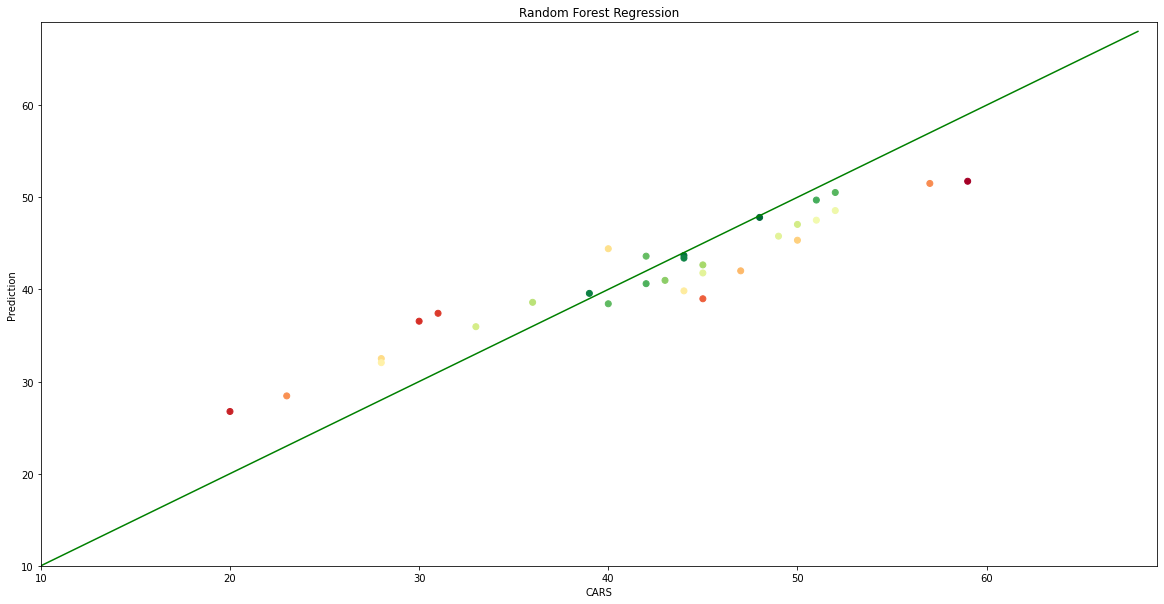

In [32]:
# Visualising the Random Forest Regression results (higher resolution)
padding = 10
min_y = min( min( y ), min( y_pred ) ) - padding
max_y = max( max( y ), max( y_pred ) ) + padding
plt.figure( figsize = ( 20, 10 ) ) ;
plt.scatter( y, regressor.predict(X), c = abs( y_pred - y ), alpha = 1.0, cmap=plt.cm.get_cmap('RdYlGn_r'))
plt.plot( list( range( min_y, max_y) ), list( range( min_y, max_y) ), color = 'green' ) 
plt.xlim( min_y, max_y )
plt.ylim( min_y, max_y )
plt.title('Random Forest Regression')
plt.xlabel('CARS')
plt.ylabel('Prediction')
plt.show()

# Buliding a regressor after over resampling

In [33]:
# Task Time(sec)
# Clicks Number
# DB Clicks Number
# MEAN CLICK DURATION (sec)
# TYPING VELOCITY (key/min)
# TOTAL TIME TYPING (sec)

X = df.iloc[:, [14, 21, 22, 23, 32, 33] ] # Columns that could be recorded in a mobile seting
y = df['CARS']

(array([2., 0., 4., 1., 2., 5., 7., 6., 2., 2.]),
 array([20. , 23.9, 27.8, 31.7, 35.6, 39.5, 43.4, 47.3, 51.2, 55.1, 59. ]),
 <BarContainer object of 10 artists>)

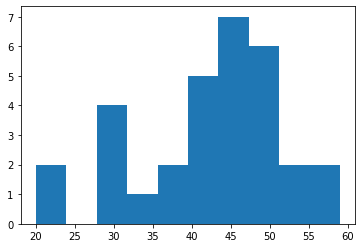

In [34]:
plt.hist( y )

In [35]:
print( len( y ) )

31


In [36]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
size = len( y_over )
prev_size = 0
while size > prev_size:
    prev_size = size 
    X_over, y_over = oversample.fit_resample(X_over, y_over) # must be only resample after previous fit
    size = len( y_over )
    print( size )

35
37
39
41
43
45
47
49
51
53
55
57
58
59
60
61
62
63
63


(array([ 6.,  0.,  9.,  3.,  6.,  9.,  9., 12.,  3.,  6.]),
 array([20. , 23.9, 27.8, 31.7, 35.6, 39.5, 43.4, 47.3, 51.2, 55.1, 59. ]),
 <BarContainer object of 10 artists>)

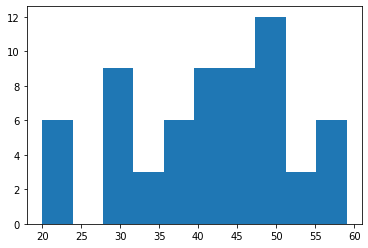

In [37]:
plt.hist( y_over )

In [38]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.2, random_state = 0)

In [39]:
# Feature Scaling
sc = StandardScaler()

X_train = sc.fit_transform( X_train_over )
X_test = sc.transform( X_test_over )

In [40]:
# Finding good n_estimators
from sklearn.ensemble import RandomForestRegressor
i = 10
mse = 100**100
n_estimators = i
r2 = 0.0
while i < 10000:
    regressor = RandomForestRegressor(n_estimators = i, random_state = 0)
    regressor.fit(X_train_over, y_train_over)
    y_pred = regressor.predict(X_test_over)
    print( 'R2: ' + str( r2_score(y_test_over, y_pred ) ) + '\tn_estimators = ' + str( i ) + '\tMSE = ' + str( mean_squared_error(y_test_over, y_pred) ) )
    if( mean_squared_error(y_test_over, y_pred) < mse ):
        mse = mean_squared_error(y_test_over, y_pred)
        n_estimators = i
        r2 = r2_score( y_test_over, y_pred )
    i = i * 2
    
print( '--> Best n_estimators=' + str( n_estimators ) + ' with MSE=' + str( mse ) + ' and R2=' + str( r2 ) ) 

R2: 0.6994710871870157	n_estimators = 10	MSE = 43.606923076923074
R2: 0.7410894298996817	n_estimators = 20	MSE = 37.56807692307693
R2: 0.7608336901557784	n_estimators = 40	MSE = 34.70317307692307
R2: 0.7574307955611287	n_estimators = 80	MSE = 35.19693509615385
R2: 0.7832461507778729	n_estimators = 160	MSE = 31.451111778846162
R2: 0.7872971524135215	n_estimators = 320	MSE = 30.863309044471148
R2: 0.784371848931253	n_estimators = 640	MSE = 31.287772310697125
R2: 0.7790288551479283	n_estimators = 1280	MSE = 32.06304387019231
R2: 0.7832299210190841	n_estimators = 2560	MSE = 31.453466726449815
R2: 0.7829872267946858	n_estimators = 5120	MSE = 31.488681802016053
--> Best n_estimators=320 with MSE=30.863309044471148 and R2=0.7872971524135215


In [41]:
#regressor = RandomForestRegressor(n_estimators = i, random_state = 0)
#print('i = ' + str(i) + 'best i '+ str( n_estimators ) )
regressor = RandomForestRegressor(n_estimators = n_estimators, random_state = 0)
regressor.fit(X_train_over, y_train_over)
y_pred = regressor.predict(X_test_over)

In [42]:
abs( y_test_over - y_pred )

43     0.087500
49     0.096875
62     8.346875
51     1.846875
32     2.303125
34     2.084375
29     8.346875
46     0.643750
11    13.803125
2      5.678125
26     2.753125
60     1.562500
4      3.950000
Name: CARS, dtype: float64

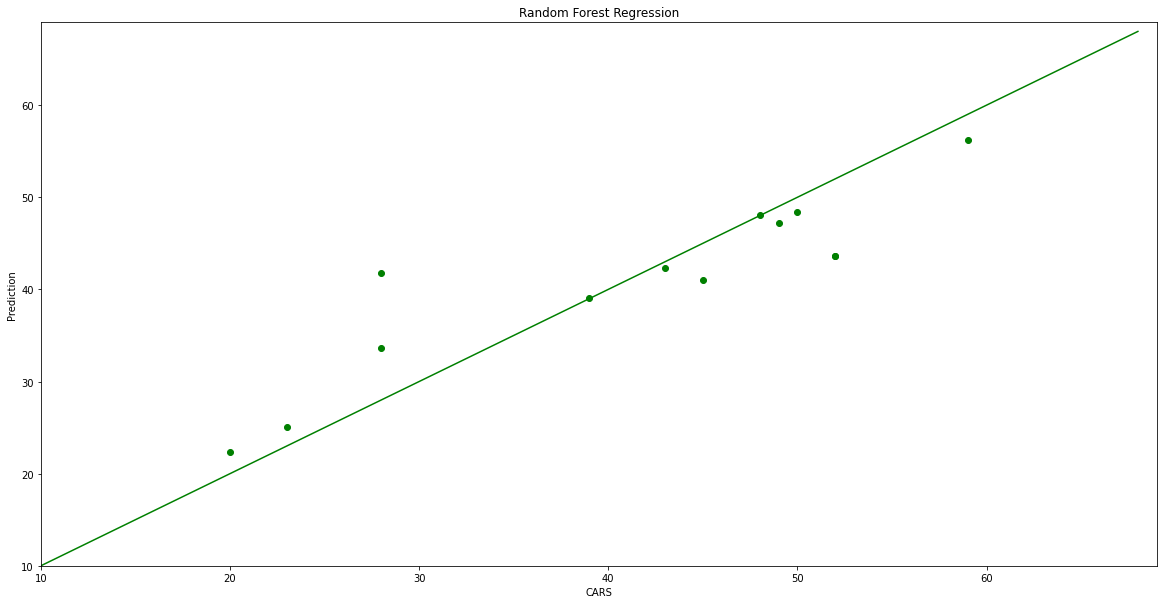

In [43]:
# Visualising the Random Forest Regression results (higher resolution)
padding = 10
min_y = min( min( y_test_over ), min( y_pred ) ) - padding
max_y = max( max( y_test_over ), max( y_pred ) ) + padding
plt.figure( figsize = ( 20, 10 ) ) ;
# plt.scatter( y_test_over, regressor.predict(X_test_over), c = abs( y_pred - y_test_over ), alpha = 1.0, cmap=plt.cm.get_cmap('RdYlGn_r'))
plt.scatter( y_test_over, regressor.predict(X_test_over), c = 'green')
plt.plot( list( range( min_y, max_y) ), list( range( min_y, max_y) ), color = 'green' ) 
plt.xlim( min_y, max_y )
plt.ylim( min_y, max_y )
plt.title('Random Forest Regression')
plt.xlabel('CARS')
plt.ylabel('Prediction')
plt.show()

# Building a Decision Tree

In [44]:
X = df.iloc[:, [14, 21, 22, 23, 32, 33] ] # Columns that could be recorded in a mobile seting
y = df['CLASS']

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
size = len( y_over )
prev_size = 0
while size > prev_size:
    prev_size = size 
    X_over, y_over = oversample.fit_resample(X_over, y_over) # must be only resample after previous fit
    size = len( y_over )
    print( size )
    
    
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()

X_train = sc.fit_transform( X_train_over )
X_test = sc.transform( X_test_over )

39
39


In [45]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train_over, y_train_over)




#y_pred2 = dtree.predict(X_test_over)
#dtree.score(y_pred2, y_pred2)
score1 = dtree.score(X_test_over, y_test_over)
score2 = dtree.score(X_train_over, y_train_over)
score3 = dtree.score(X, y)

print("Score 1 ", score1)
print("Score 2 ", score2)
print("Score 3 ", score3)


#new_series = pd.Series(y_pred2)
#print(new_series)


#abs( y_test_over - y_pred2 )



Score 1  0.625
Score 2  1.0
Score 3  0.9032258064516129


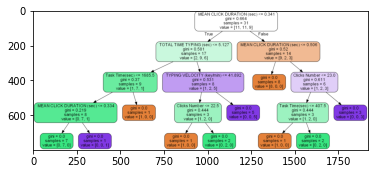

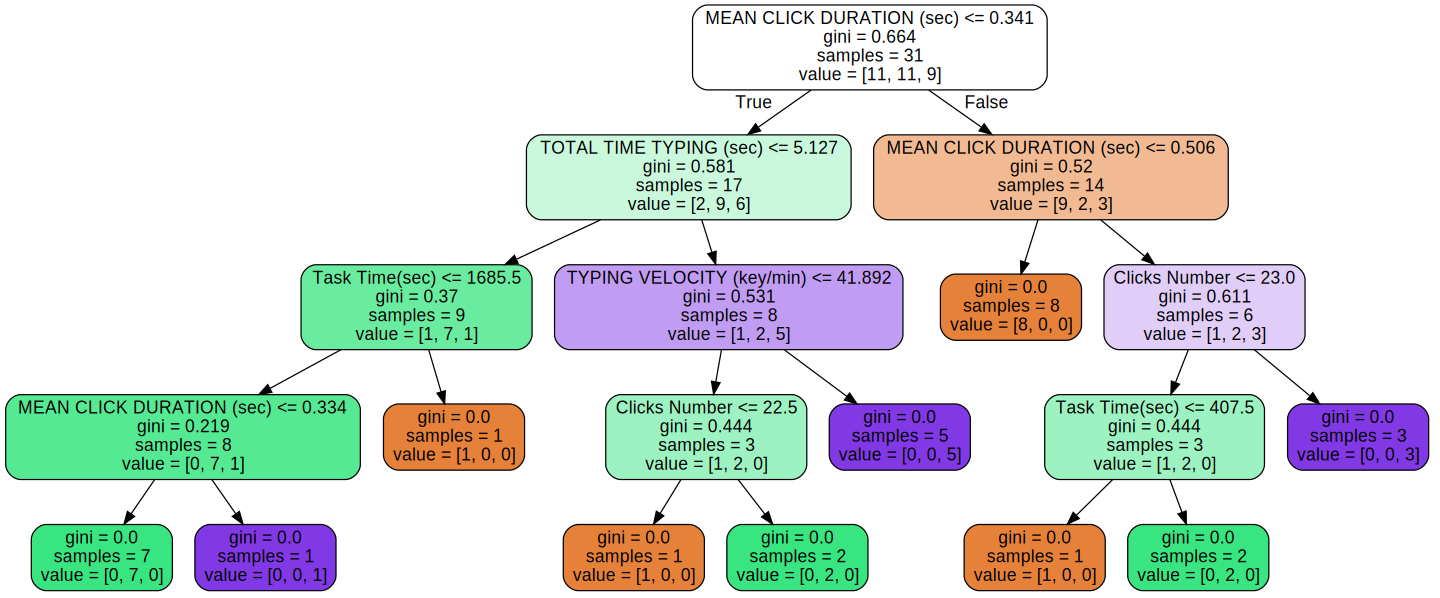

In [46]:
col_names = X.columns

data = tree.export_graphviz(dtree, out_file=None, feature_names=col_names,filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(data)
graph.set_size('"20,20!"')
graph.write_png('decisionTree.png')

graph.write_png('resized_tree.png')



img=pltimg.imread('resized_tree.png')
imgplot = plt.imshow(img)
plt.show()

import graphviz
gvz_graph = graphviz.Source(graph.to_string())
gvz_graph

In [47]:
yp = dtree.predict(X_test_over)
# Visualising the Random Forest Regression results (higher resolution)
padding = 10
min_y = min( min( y_test_over ), min( yp ) ) - padding
max_y = max( max( y_test_over ), max( yp ) ) + padding
plt.figure( figsize = ( 20, 10 ) ) ;
# plt.scatter( y_test_over, regressor.predict(X_test_over), c = abs( y_pred - y_test_over ), alpha = 1.0, cmap=plt.cm.get_cmap('RdYlGn_r'))
plt.scatter( y_test_over, lreg.predict(X_test_over), c = 'green')
plt.plot( list( range( min_y, max_y) ), list( range( min_y, max_y) ), color = 'green' ) 
plt.xlim( min_y, max_y )
plt.ylim( min_y, max_y )
plt.title('Linear Regression')
plt.xlabel('CARS')
plt.ylabel('Prediction')
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'int'

# Building a Linear Regression

In [ ]:
# Create the linear regressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#regressor.fit(X_train_over, y_train_over)
#y_pred = regressor.predict(X_test_over)

#print(X_test_over)
#print(y_test_over)

lreg = LinearRegression()
lreg.fit(X_train_over, y_train_over) 


##########


# Make predictions using the testing set
y_pred = lreg.predict(X_test_over)
#print("yy ", len(y_pred))
#print("xx ", len(X_test_over))


# The coefficients
print('Coefficients: \n', lreg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_over, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_over, y_pred))


scor = lreg.score(X_train_over, y_train_over)
print("score ", scor)
#yp = lreg.predict(X_test_over)
#print("yp ",yp )


#abs( y_test_over - yp )


In [ ]:
# Visualising the Random Forest Regression results (higher resolution)
padding = 10
min_y = min( min( y_test_over ), min( yp ) ) - padding
max_y = max( max( y_test_over ), max( yp ) ) + padding
plt.figure( figsize = ( 20, 10 ) ) ;
# plt.scatter( y_test_over, regressor.predict(X_test_over), c = abs( y_pred - y_test_over ), alpha = 1.0, cmap=plt.cm.get_cmap('RdYlGn_r'))
plt.scatter( y_test_over, lreg.predict(X_test_over), c = 'green')
plt.plot( list( range( min_y, max_y) ), list( range( min_y, max_y) ), color = 'green' ) 
plt.xlim( min_y, max_y )
plt.ylim( min_y, max_y )
plt.title('Linear Regression')
plt.xlabel('CARS')
plt.ylabel('Prediction')
plt.show()

   # Tree Classifier

In [ ]:
from sklearn import metrics 
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train_over, y_train_over) 


test_pred_decision_tree = clf.predict(X_test_over)
metrics.accuracy_score(y_test_over, test_pred_decision_tree)

#y_pred = clf.predict(X_test_over)
#abs( y_test_over - yp )

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#print(X)
#print(y)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_over, y_train_over) 


test_pred_decision_tree = clf.predict(X_test_over)
metrics.accuracy_score(y_test_over, test_pred_decision_tree)

#y_pred = clf.predict(X_test_over)
#abs( y_test_over - yp )